In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 2.0/2.0 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 4.9 MB/s eta 0:00:00
     --------------------------------------- 46.2/46.2 MB 11.7 MB/s eta 0:00:00
     --------------------------------------- 11.0/11.0 MB 14.5 MB/s eta 0:00:00
     --------------------------------------- 11.6/11.6 MB 18.2 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 5.8 MB/s eta 0:00:00
     ------------------------------------- 159.8/159.8 MB 34.5 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 31.5 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

DEMO_URL = 'http://ctgan-demo.s3.amazonaws.com/census.csv.gz'


def load_demo():
    """Load the demo."""
    return pd.read_csv(DEMO_URL, compression='gzip')

df = load_demo()
# adult_label = adult.iloc[:,-1]
# target = adult.iloc[:,:-1]
print(df.columns)
df

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
from sklearn.preprocessing import KBinsDiscretizer

# Assuming 'Feature1', 'Feature2', 'Feature3', and 'Feature4' are continuous variables
features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Discretize the continuous features into 3 bins each
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df[features] = discretizer.fit_transform(df[features])

print(df.head())


   age          workclass  fnlwgt   education  education-num  \
0  0.0          State-gov     0.0   Bachelors            2.0   
1  1.0   Self-emp-not-inc     0.0   Bachelors            2.0   
2  0.0            Private     0.0     HS-grad            1.0   
3  1.0            Private     0.0        11th            1.0   
4  0.0            Private     0.0   Bachelors            2.0   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0           0.0           0.0             1.0   United-States   <=50

In [5]:
from pgmpy.models import BayesianNetwork

# Define the structure of the Bayesian Network
# Assume the target variable is 'Target' and the features are 'Feature1', 'Feature2', 'Feature3', and 'Feature4'
model = BayesianNetwork([('age', 'income'),
                         ('workclass', 'income'),
                         ('fnlwgt', 'income'),
                         ('education', 'income'),
                         ('education-num', 'income'),
                         ('marital-status', 'income'),
                        ('occupation', 'income'),
                         ('relationship', 'income'),
                         ('race', 'income'),
                           ('sex', 'income'),
                         ('capital-gain', 'income'),
                         ('capital-loss', 'income'),
                         ('hours-per-week', 'income'),
                         ('native-country', 'income'),
                         ]
                        )


D:\SummerResearch\summer_research\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Fit the model to the data
model.fit(df, estimator=MaximumLikelihoodEstimator)


MemoryError: Unable to allocate 25.9 GiB for an array with shape (27776649600,) and data type int8

In [ ]:
from pgmpy.inference import VariableElimination

# Create an inference object
inference = VariableElimination(model)

# Assume we have a new data point with the features
new_data = pd.read_csv("adult_sdv_100k_onlyX.csv")

# Predict the target
predicted_target = inference.map_query(variables=['Target'], evidence=new_data)
print(predicted_target)


In [4]:
import pandas as pd
data_DIR = "../data"
dataset_type = 'sdv_categorical'
dataset_name = 'census'
adult_ds = pd.read_csv(f"{data_DIR}/{dataset_name}/{dataset_name}_{dataset_type}_100k.csv", index_col=0)
adult_ds.income.unique()

array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object)

In [11]:
from ucimlrepo import fetch_ucirepo 
dataset = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets

In [12]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def prepend_col_name(df, columns):
    for col in columns:
        print(type(col), col)
        df[col] = df[col].apply(lambda x: f"{col}_{x}")
    return df

def onehot(x_train, x_test, categorical_columns, verbose=False):
  # Prepend column names to train and test
  xtrain = prepend_col_name(x_train, categorical_columns)
  xtest = prepend_col_name(x_test, categorical_columns)

  # Automatically determine the numerical columns
  numerical_cols = list(set(xtrain.columns) - set(categorical_columns))

  # Prepare train_prep and test_prep
  xtrain_prep = xtrain[numerical_cols]
  xtest_prep = xtest[numerical_cols]

    # One-Hot Encoding with modified categorical values
  for col in categorical_columns:

      # One-Hot Encoding for xtrain
      xtrain_onehot = OneHotEncoder().fit_transform(xtrain[col].values.reshape(-1,1))
      xtrain_onehot = xtrain_onehot.toarray()
      xtrain_onehot = pd.DataFrame(xtrain_onehot, columns = xtrain[col].unique())
      xtrain_prep = pd.concat([xtrain_prep, xtrain_onehot], axis=1)

      # One-Hot Encoding for xtest
      xtest_onehot = OneHotEncoder().fit_transform(xtest[col].values.reshape(-1,1))
      xtest_onehot = xtest_onehot.toarray()
      xtest_onehot = pd.DataFrame(xtest_onehot, columns = xtest[col].unique())
      xtest_onehot = xtest_onehot.set_index(xtest.index)
      xtest_prep = pd.concat([xtest_prep, xtest_onehot], axis=1)

      # Check differences between xtrain and xtest
      if verbose:
        dif1 = set(xtest[col].unique()) - set(xtrain[col].unique())
        print(col)
        print(len(dif1), dif1)

  return xtrain_prep, xtest_prep


In [14]:
onehot_X, _ = onehot(X, X, ['workclass', 'education', 'marital-status', 'occupation', 
                                        'relationship', 'race', 'sex', 'native-country'])
onehot_X

<class 'str'> workclass
<class 'str'> education
<class 'str'> marital-status
<class 'str'> occupation
<class 'str'> relationship
<class 'str'> race
<class 'str'> sex
<class 'str'> native-country
<class 'str'> workclass
<class 'str'> education
<class 'str'> marital-status
<class 'str'> occupation
<class 'str'> relationship


C:\Users\admin\AppData\Local\Temp\ipykernel_1036\125149793.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: f"{col}_{x}")


<class 'str'> race
<class 'str'> sex
<class 'str'> native-country


,fnlwgt,capital-gain,age,capital-loss,hours-per-week,education-num,workclass_workclass_State-gov,workclass_workclass_Self-emp-not-inc,workclass_workclass_Private,workclass_workclass_Federal-gov,...,native-country_native-country_Scotland,native-country_native-country_Trinadad&Tobago,native-country_native-country_Greece,native-country_native-country_Nicaragua,native-country_native-country_Vietnam,native-country_native-country_Hong,native-country_native-country_Ireland,native-country_native-country_Hungary,native-country_native-country_Holand-Netherlands,native-country_native-country_nan
0,77516,2174,39,0,40,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,83311,0,50,0,13,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,215646,0,38,0,40,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,234721,0,53,0,40,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,338409,0,28,0,40,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,215419,0,39,0,36,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48838,321403,0,64,0,40,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,374983,0,38,0,50,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48840,83891,5455,44,0,40,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# specified Bayesian Network

In [1]:
import pgmpy
from pgmpy.models import BayesianNetwork


In [2]:
from synthesize_data import pca
import numpy as np
import pandas as pd

# df_ori = pd.read_csv("D:\\SummerResearch\\data\\adult\\onehot_adult_train.csv")
# df_syn = pd.read_csv("D:\\SummerResearch\data\\adult\\onehot_adult_sdv_gaussian_100k.csv")


# df_ori = pd.read_csv("D:\SummerResearch\data\covertype\onehot_covertype_train.csv")
# df_syn = pd.read_csv("D:\SummerResearch\data\covertype\onehot_covertype_sdv_gaussian_100k.csv")
# df_syn.drop(columns=['Unnamed: 0'], inplace=True)
# df_ori, df_syn = pca.pca(df_ori, df_syn, target_name= 'Cover_Type', n_components= 0.999)



df_ori = pd.read_csv("D:\SummerResearch\data\credit\onehot_credit_train.csv")
df_syn = pd.read_csv("D:\SummerResearch\data\credit\onehot_credit_sdv_gaussian_100k.csv")
df_syn.drop(columns=['Unnamed: 0'], inplace=True)

print(df_ori.shape, df_syn.shape)
print(set(df_ori.columns) - set(df_syn.columns))
print(set(df_syn.columns) - set(df_ori.columns))

# df_ori, df_syn = pca.pca_df(df_ori, df_syn, target_name= 'Class', verbose=True)

df_ori, df_syn = pca.auto_pca(df_ori, df_syn, target_name= 'Class', verbose=True, min_components=5, lower_variance_threshold=0.0999)


df_ori

(274807, 31) (100000, 31)
set()
set()
Number of components selected: 5
Cumulative explained variance: 0.9999999911002513


,PC1,PC2,PC3,PC4,PC5,Class
0,40515.184692,12.977615,-0.888353,0.244546,0.121906,0
1,77491.188983,-61.447608,-0.398482,0.215002,-0.582466,0
2,27430.182672,48.238226,-0.197489,-1.108589,-2.825634,0
3,59514.190170,-82.967270,-0.453596,0.145872,-0.714901,0
4,22884.187534,-37.024629,-0.414552,0.946749,0.065243,0
...,...,...,...,...,...,...
274802,27898.180142,93.263295,1.654535,-0.132389,0.460585,0
274803,41386.189975,-79.985124,-0.444256,0.238212,-0.355463,0
274804,-91852.809528,-92.532909,-0.293342,-0.114927,-2.102331,0
274805,52920.189961,-79.329571,1.748681,-0.206327,0.240422,0


In [3]:
df_syn

,PC1,PC2,PC3,PC4,PC5,Class
0,-94788.940428,-56.069178,-821.295664,-1810.814577,249.912138,0
1,-94785.498814,-72.120612,-605.989861,-1336.300527,184.851172,0
2,-94789.277050,-130.080676,-738.916422,-1630.523204,224.649576,0
3,-94788.973420,-91.080984,-681.202276,-1502.421904,207.511808,0
4,-94788.105715,-100.967102,-271.793386,-599.338536,82.989328,0
...,...,...,...,...,...,...
99995,-94788.841683,-103.916795,-254.255829,-561.467595,77.126340,0
99996,-94788.555612,-136.313317,-796.950987,-1759.935905,243.727601,0
99997,-94789.739587,-35.250225,-243.647450,-541.478699,74.077776,0
99998,-94789.154874,-117.709914,-832.414205,-1834.906486,253.563342,0


In [4]:
# Define the structure of the Bayesian Network
# Assume the target variable is 'Target' and the features are 'Feature1', 'Feature2', 'Feature3', and 'Feature4'

features = df_ori.columns.tolist()
target = 'Class'

model = BayesianNetwork()
edges = [(feature, 'Class') for feature in features if feature != 'Class']
model.add_edges_from(edges)



In [7]:
type(model)

pgmpy.models.BayesianNetwork.BayesianNetwork

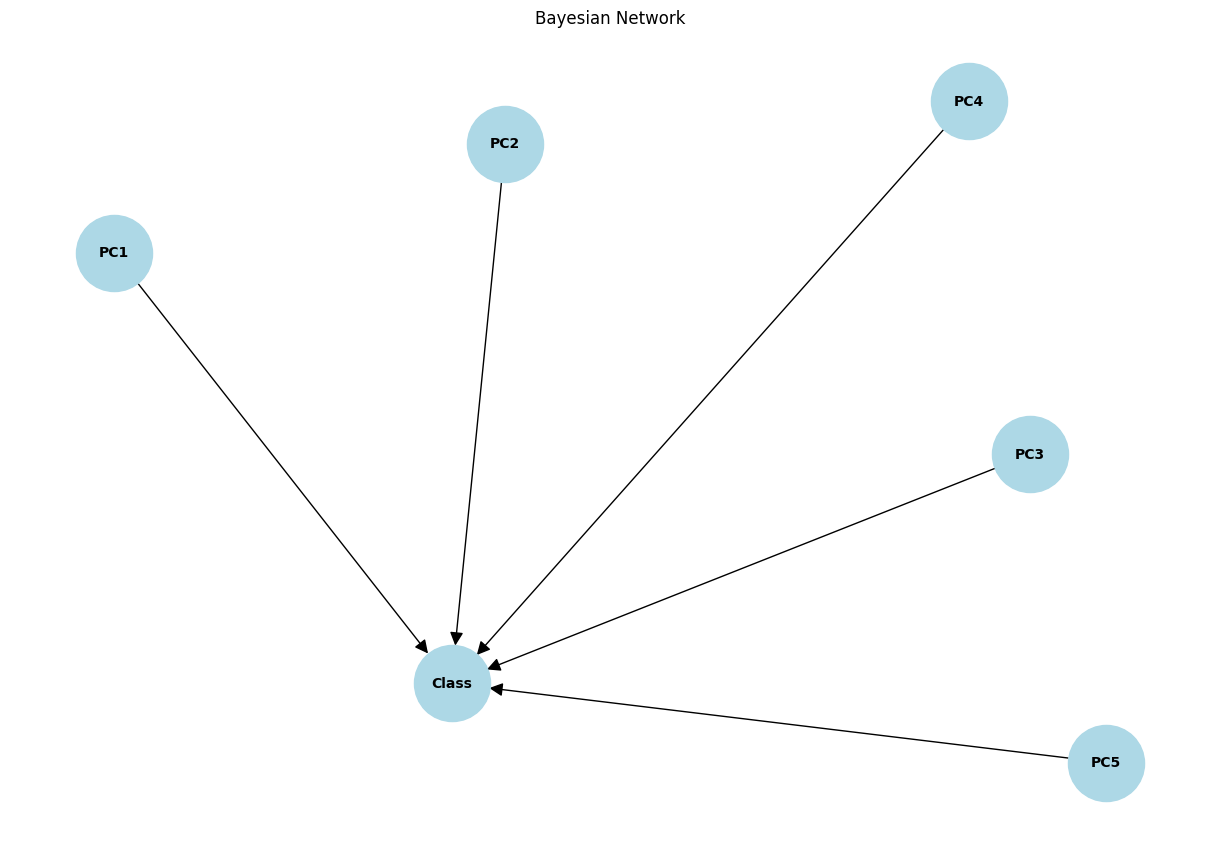

In [5]:
import networkx as nx

import matplotlib.pyplot as plt

# Convert the Bayesian Network to a networkx graph
G = nx.DiGraph(model.edges())

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Bayesian Network')
plt.show()

In [6]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Fit the model to the data
model.fit(df_ori, estimator=MaximumLikelihoodEstimator)

ValueError: Product space too large to allocate arrays!